In [ ]:
!pip install tensorflow==2.7.0 tensorflow-gpu==2.7.0 opencv-python mediapipe sklearn matplotlib


You should consider upgrading via the 'C:\Users\crypt\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import seaborn as sns
import mediapipe as mp

In [ ]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [ ]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [ ]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [ ]:
mp_drawing.draw_landmarks??

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()      

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

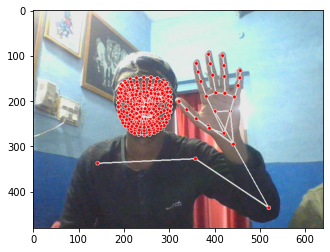

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.38915449,  0.43423811, -0.63162518, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.38915449,  0.43423811, -0.63162518, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [23]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

NameError: name 'actions' is not defined

In [24]:
label_map

NameError: name 'label_map' is not defined

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [ ]:
np.array(labels).shape

(90,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(90, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(5, 3)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
res = [.7, 0.2, 0.1]

In [44]:
actions[np.argmax(res)]

'hello'

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 153ms/step - loss: 1.2678 - categorical_accuracy: 0.3647
Epoch 2/2000
3/3 [==============================] - 0s 147ms/step - loss: 2.9838 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 163ms/step - loss: 11.7429 - categorical_accuracy: 0.3059
Epoch 4/2000
3/3 [==============================] - 0s 164ms/step - loss: 17.7835 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 154ms/step - loss: 11.1651 - categorical_accuracy: 0.2588
Epoch 6/2000
3/3 [==============================] - 0s 148ms/step - loss: 6.2091 - categorical_accuracy: 0.4000
Epoch 7/2000
3/3 [==============================] - 0s 143ms/step - loss: 15.9229 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 0s 155ms/step - loss: 16.1650 - categorical_accuracy: 0.2941
Epoch 9/2000
3/3 [==============================] - 0s 157ms/step - loss: 26.6023 - categorical_acc

3/3 [==============================] - 0s 156ms/step - loss: 10.0292 - categorical_accuracy: 0.2941
Epoch 144/2000
3/3 [==============================] - 0s 157ms/step - loss: 10.5667 - categorical_accuracy: 0.3059
Epoch 145/2000
3/3 [==============================] - 0s 122ms/step - loss: 13.6438 - categorical_accuracy: 0.2706
Epoch 146/2000
3/3 [==============================] - 0s 142ms/step - loss: 16.4622 - categorical_accuracy: 0.4000
Epoch 147/2000
3/3 [==============================] - 0s 128ms/step - loss: 15.9213 - categorical_accuracy: 0.3059
Epoch 148/2000
3/3 [==============================] - 0s 131ms/step - loss: 13.3648 - categorical_accuracy: 0.3529
Epoch 149/2000
3/3 [==============================] - 0s 107ms/step - loss: 27.0089 - categorical_accuracy: 0.3529
Epoch 150/2000
3/3 [==============================] - 0s 126ms/step - loss: 16.4863 - categorical_accuracy: 0.3765
Epoch 151/2000
3/3 [==============================] - 0s 105ms/step - loss: 20.4866 - categoric

3/3 [==============================] - 0s 163ms/step - loss: 5.8913 - categorical_accuracy: 0.4118
Epoch 286/2000
3/3 [==============================] - 0s 161ms/step - loss: 5.2948 - categorical_accuracy: 0.3529
Epoch 287/2000
3/3 [==============================] - 0s 160ms/step - loss: 6.0846 - categorical_accuracy: 0.4706
Epoch 288/2000
3/3 [==============================] - 0s 160ms/step - loss: 6.7712 - categorical_accuracy: 0.3765
Epoch 289/2000
3/3 [==============================] - 0s 159ms/step - loss: 8.2951 - categorical_accuracy: 0.4941
Epoch 290/2000
3/3 [==============================] - 0s 134ms/step - loss: 4.1922 - categorical_accuracy: 0.4235
Epoch 291/2000
3/3 [==============================] - 0s 157ms/step - loss: 5.1036 - categorical_accuracy: 0.3294
Epoch 292/2000
3/3 [==============================] - 0s 126ms/step - loss: 6.8860 - categorical_accuracy: 0.3059
Epoch 293/2000
3/3 [==============================] - 0s 153ms/step - loss: 4.1073 - categorical_accura

Epoch 357/2000
3/3 [==============================] - 0s 146ms/step - loss: 7.8966 - categorical_accuracy: 0.2588
Epoch 358/2000
3/3 [==============================] - 0s 152ms/step - loss: 7.2637 - categorical_accuracy: 0.3765
Epoch 359/2000
3/3 [==============================] - 0s 147ms/step - loss: 6.1669 - categorical_accuracy: 0.3294
Epoch 360/2000
3/3 [==============================] - 0s 147ms/step - loss: 7.7200 - categorical_accuracy: 0.3412
Epoch 361/2000
3/3 [==============================] - 0s 148ms/step - loss: 7.1236 - categorical_accuracy: 0.3059
Epoch 362/2000
3/3 [==============================] - 0s 128ms/step - loss: 7.5991 - categorical_accuracy: 0.3647
Epoch 363/2000
3/3 [==============================] - 0s 142ms/step - loss: 10.0480 - categorical_accuracy: 0.3412
Epoch 364/2000
3/3 [==============================] - 0s 130ms/step - loss: 7.3415 - categorical_accuracy: 0.3294
Epoch 365/2000
3/3 [==============================] - 0s 147ms/step - loss: 4.0216 - ca

Epoch 500/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.1495 - categorical_accuracy: 0.4353
Epoch 501/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.2054 - categorical_accuracy: 0.3176
Epoch 502/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.3383 - categorical_accuracy: 0.3529
Epoch 503/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.4930 - categorical_accuracy: 0.3412
Epoch 504/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.8187 - categorical_accuracy: 0.3882
Epoch 505/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.7089 - categorical_accuracy: 0.4118
Epoch 506/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.5794 - categorical_accuracy: 0.3765
Epoch 507/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.7624 - categorical_accuracy: 0.3647
Epoch 508/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.9514 - cat

Epoch 643/2000
3/3 [==============================] - 0s 150ms/step - loss: 1.5835 - categorical_accuracy: 0.4118
Epoch 644/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.8632 - categorical_accuracy: 0.3294
Epoch 645/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.6427 - categorical_accuracy: 0.4118
Epoch 646/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.4882 - categorical_accuracy: 0.4000
Epoch 647/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.2090 - categorical_accuracy: 0.3529
Epoch 648/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.5675 - categorical_accuracy: 0.3529
Epoch 649/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.1234 - categorical_accuracy: 0.4353
Epoch 650/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.3907 - categorical_accuracy: 0.4235
Epoch 651/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.3686 - cat

Epoch 786/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.0451 - categorical_accuracy: 0.4353
Epoch 787/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.1590 - categorical_accuracy: 0.3529
Epoch 788/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.1906 - categorical_accuracy: 0.4471
Epoch 789/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.0184 - categorical_accuracy: 0.4353
Epoch 790/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.5450 - categorical_accuracy: 0.3882
Epoch 791/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.5091 - categorical_accuracy: 0.4000
Epoch 792/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.6838 - categorical_accuracy: 0.3882
Epoch 793/2000
3/3 [==============================] - 0s 150ms/step - loss: 1.6904 - categorical_accuracy: 0.3882
Epoch 794/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.7363 - cat

Epoch 929/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.2755 - categorical_accuracy: 0.4000
Epoch 930/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.4511 - categorical_accuracy: 0.3647
Epoch 931/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.1798 - categorical_accuracy: 0.4471
Epoch 932/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.3765 - categorical_accuracy: 0.3412
Epoch 933/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.5947 - categorical_accuracy: 0.4235
Epoch 934/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.2443 - categorical_accuracy: 0.3176
Epoch 935/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.1332 - categorical_accuracy: 0.3882
Epoch 936/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.2881 - categorical_accuracy: 0.4118
Epoch 937/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.4770 - cat

3/3 [==============================] - 0s 144ms/step - loss: 1.4425 - categorical_accuracy: 0.2588
Epoch 1072/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.6894 - categorical_accuracy: 0.3765
Epoch 1073/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.2605 - categorical_accuracy: 0.4706
Epoch 1074/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.4926 - categorical_accuracy: 0.3765
Epoch 1075/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.2569 - categorical_accuracy: 0.3765
Epoch 1076/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.2878 - categorical_accuracy: 0.4941
Epoch 1077/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.2426 - categorical_accuracy: 0.4000
Epoch 1078/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.2110 - categorical_accuracy: 0.3882
Epoch 1079/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.1614 - categorica

3/3 [==============================] - 0s 152ms/step - loss: 0.9827 - categorical_accuracy: 0.4706
Epoch 1214/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.9479 - categorical_accuracy: 0.4824
Epoch 1215/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.0100 - categorical_accuracy: 0.4471
Epoch 1216/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.9707 - categorical_accuracy: 0.4471
Epoch 1217/2000
3/3 [==============================] - 0s 150ms/step - loss: 1.0148 - categorical_accuracy: 0.4235
Epoch 1218/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.9790 - categorical_accuracy: 0.4353
Epoch 1219/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.9873 - categorical_accuracy: 0.4000
Epoch 1220/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.9691 - categorical_accuracy: 0.4471
Epoch 1221/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.9572 - categorica

3/3 [==============================] - 0s 153ms/step - loss: 1.0916 - categorical_accuracy: 0.4000
Epoch 1356/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.9776 - categorical_accuracy: 0.4353
Epoch 1357/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.9923 - categorical_accuracy: 0.4588
Epoch 1358/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.0398 - categorical_accuracy: 0.4471
Epoch 1359/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.1644 - categorical_accuracy: 0.4000
Epoch 1360/2000
3/3 [==============================] - 0s 151ms/step - loss: 1.0977 - categorical_accuracy: 0.3882
Epoch 1361/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.1359 - categorical_accuracy: 0.4353
Epoch 1362/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.0308 - categorical_accuracy: 0.4941
Epoch 1363/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.0350 - categorica

3/3 [==============================] - 0s 150ms/step - loss: 1.1037 - categorical_accuracy: 0.3412
Epoch 1498/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.1037 - categorical_accuracy: 0.3412
Epoch 1499/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.1036 - categorical_accuracy: 0.3412
Epoch 1500/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.1036 - categorical_accuracy: 0.3412
Epoch 1501/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.1036 - categorical_accuracy: 0.3412
Epoch 1502/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.1035 - categorical_accuracy: 0.3412
Epoch 1503/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.1035 - categorical_accuracy: 0.3412
Epoch 1504/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.1034 - categorical_accuracy: 0.3412
Epoch 1505/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.1034 - categorica

3/3 [==============================] - 0s 148ms/step - loss: 1.0996 - categorical_accuracy: 0.3412
Epoch 1640/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0996 - categorical_accuracy: 0.3412
Epoch 1641/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.0996 - categorical_accuracy: 0.3412
Epoch 1642/2000
3/3 [==============================] - 0s 151ms/step - loss: 1.0996 - categorical_accuracy: 0.3412
Epoch 1643/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.0996 - categorical_accuracy: 0.3412
Epoch 1644/2000
3/3 [==============================] - 0s 153ms/step - loss: 1.0995 - categorical_accuracy: 0.3412
Epoch 1645/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.0995 - categorical_accuracy: 0.3412
Epoch 1646/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.0995 - categorical_accuracy: 0.3412
Epoch 1647/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.0995 - categorica

3/3 [==============================] - 0s 150ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1782/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1783/2000
3/3 [==============================] - 0s 150ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1784/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1785/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1786/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1787/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1788/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 1789/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.0984 - categorica

3/3 [==============================] - 0s 145ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1924/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1925/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1926/2000
3/3 [==============================] - 0s 149ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1927/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1928/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1929/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1930/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1931/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.0981 - categorica

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

NameError: name 'MP_Data' is not defined